In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [31]:
## 1.Exploratory Data Analysis
# Loading and exploring the data 
df = pd.read_csv("house_price_data.csv")   
print(df.head())                          


     Area  Bedrooms  Bathrooms   Location       Price
0  1500.0       2.0        3.0     Mumbai   9684000.0
1  2400.0       3.0        1.0  Bangalore  11961600.0
2  1200.0       4.0        3.0        NaN   5356800.0
3     NaN       4.0        3.0  Bangalore         0.0
4  3000.0       2.0        2.0      Delhi  14625000.0


In [6]:
# Number of rows and columns
df.shape

(420, 5)

In [18]:
# List of all column names
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Location', 'Price'], dtype='object')

In [7]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       349 non-null    float64
 1   Bedrooms   357 non-null    float64
 2   Bathrooms  349 non-null    float64
 3   Location   342 non-null    object 
 4   Price      396 non-null    float64
dtypes: float64(4), object(1)
memory usage: 16.5+ KB


In [8]:
# Summary of data
df.describe


<bound method NDFrame.describe of        Area  Bedrooms  Bathrooms   Location       Price
0    1500.0       2.0        3.0     Mumbai   9684000.0
1    2400.0       3.0        1.0  Bangalore  11961600.0
2    1200.0       4.0        3.0        NaN   5356800.0
3       NaN       4.0        3.0  Bangalore         0.0
4    3000.0       2.0        2.0      Delhi  14625000.0
..      ...       ...        ...        ...         ...
415  1200.0       4.0        NaN     Mumbai   7951200.0
416  1500.0       3.0        NaN  Hyderabad   5752500.0
417  3000.0       4.0        2.0      Delhi  16107000.0
418  1200.0       3.0        3.0     Mumbai   7351200.0
419  3000.0       3.0        NaN  Hyderabad         NaN

[420 rows x 5 columns]>

In [9]:
# Checking for missing values
df.isnull().sum()


Area         71
Bedrooms     63
Bathrooms    71
Location     78
Price        24
dtype: int64

In [19]:
# Exploring categorical Columns
df['Location'].value_counts()


Location
Hyderabad    85
Mumbai       70
Delhi        65
Pune         65
Bangalore    57
Name: count, dtype: int64

In [20]:
# Checking unique values
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Area: 5 unique values
Bedrooms: 3 unique values
Bathrooms: 3 unique values
Location: 5 unique values
Price: 313 unique values


In [21]:
# Checking for duplicates
df.duplicated().sum()


45

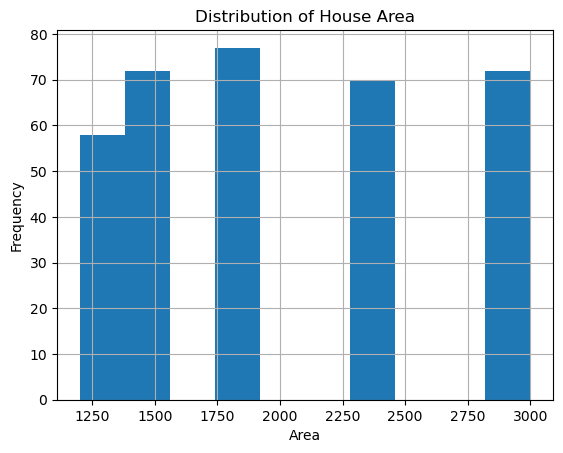

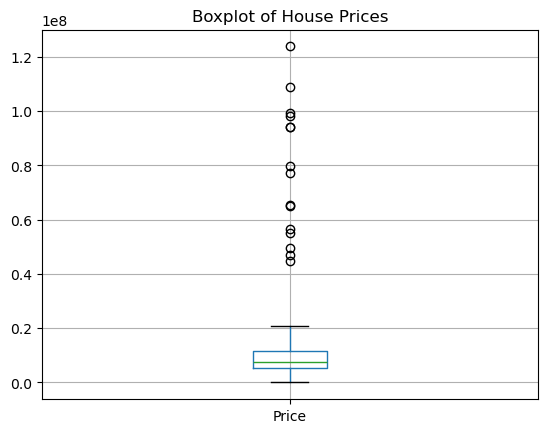

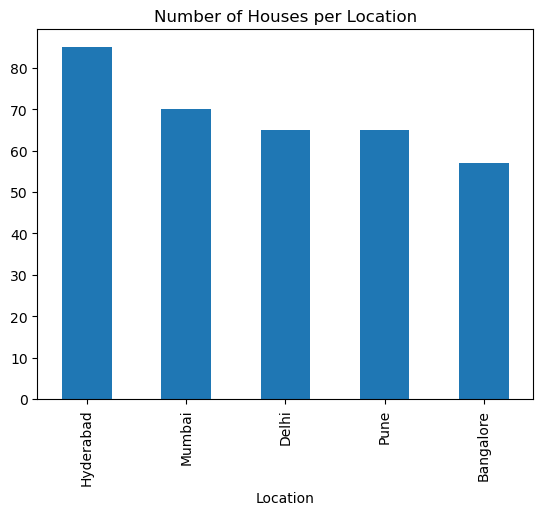

In [22]:
# Visualization for reference
import matplotlib.pyplot as plt

# Histogram of Area
df['Area'].hist(bins=10)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Distribution of House Area')
plt.show()

# Boxplot for Price (to check outliers)
df.boxplot(column='Price')
plt.title('Boxplot of House Prices')
plt.show()

# Bar chart for Location
df['Location'].value_counts().plot(kind='bar')
plt.title('Number of Houses per Location')
plt.show()


In [23]:
## 2. Data Preprocessing
df.isnull().sum()


Area         71
Bedrooms     63
Bathrooms    71
Location     78
Price        24
dtype: int64

In [25]:
# For area we fill the missing value with median because this is an important feature  for prediction and robust for outliers
df['Area'] = df['Area'].fillna(df['Area'].median())



In [31]:
# Filling with mode as there are discrete small numbers
df['Bedrooms'].fillna(df['Bedrooms'].mode()[0])



0      2.0
1      3.0
2      4.0
3      4.0
4      2.0
      ... 
415    4.0
416    3.0
417    4.0
418    3.0
419    3.0
Name: Bedrooms, Length: 420, dtype: float64

In [32]:
# Important factor for price filled with mode as there discrete small numbers
df['Bathrooms'].fillna(df['Bathrooms'].mode()[0])


0      3.0
1      1.0
2      3.0
3      3.0
4      2.0
      ... 
415    3.0
416    3.0
417    2.0
418    3.0
419    3.0
Name: Bathrooms, Length: 420, dtype: float64

In [33]:
# Filling with mode as the data is categorical and and frequent location likely
df['Location'].fillna(df['Location'].mode()[0])


0         Mumbai
1      Bangalore
2      Hyderabad
3      Bangalore
4          Delhi
         ...    
415       Mumbai
416    Hyderabad
417        Delhi
418       Mumbai
419    Hyderabad
Name: Location, Length: 420, dtype: object

In [34]:
# We would remove the target values instead of fill as filling would confuse the model
df = df.dropna(subset=['Price'])


In [35]:
# Verifying the missing values are gone 
df.isnull().sum()


Area          0
Bedrooms      0
Bathrooms    67
Location     77
Price         0
dtype: int64

In [36]:
# Use mode because bathroom counts are discrete like bedrooms.
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].mode()[0])


In [37]:
# Use mode again — the most frequent location.
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])


In [38]:
df.isnull().sum()


Area         0
Bedrooms     0
Bathrooms    0
Location     0
Price        0
dtype: int64

In [39]:
## 3. Feature Encoding and splitting the data
# Encoding Location (One Hot Encoding)
df = pd.get_dummies(df, columns=['Location'], drop_first=True)


In [40]:
# Splitting the data into Feature (X) and Target (Y)
X = df.drop('Price', axis=1)   # independent variables
y = df['Price']               # target variable


In [41]:
# Split Data into Train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [49]:
# Removing extreme values which could distort the model
#use the Interquartile Range (IQR) method to find and remove extreme price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 15


In [50]:
# Removing extreme values which could distort the model
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]


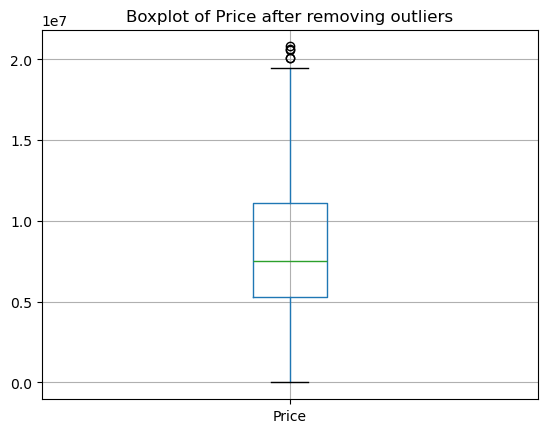

In [56]:
# Checking with boxplot
import matplotlib.pyplot as plt
df.boxplot(column='Price')
plt.title('Boxplot of Price after removing outliers')
plt.show()


In [51]:
## 4.Model Training
# Using Linear Regression as relationship between features and price is often linear
from sklearn.linear_model import LinearRegression


In [52]:
# Initialize and training the model 
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [53]:
# Making prediction the dataset
y_pred = model.predict(X_test)


In [55]:
# Evalute the Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 6303844.315383827
Root Mean Squared Error (RMSE): 14865675.908016516
R² Score: -0.02467292575663449


In [58]:
# Using random forest 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 6303844.315383827
Root Mean Squared Error (RMSE): 14865675.908016516
R² Score: -0.02467292575663449


In [59]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)


Price                 1.000000
Area                  0.656366
Location_Mumbai       0.322870
Location_Delhi        0.108182
Bathrooms            -0.055090
Location_Pune        -0.072286
Bedrooms             -0.120547
Location_Hyderabad   -0.254746
Name: Price, dtype: float64